Learning Pytorch 
Build your first model

In [16]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
import timm
import matplotlib.pyplot as plt
import sys 
from tqdm.notebook import tqdm  #progress bar


In [4]:
#for future compatability check modules versions

print('System version: ', sys.version)
print('PyTorch: ', torch.__version__)
print('TorchVision: ', torchvision.__version__)
print('Numpy: ', np.__version__)
print('Pandas: ', pd.__version__)


System version:  3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0]
PyTorch:  2.6.0+cu124
TorchVision:  0.21.0+cu124
Numpy:  1.26.4
Pandas:  2.2.3


Step 1 
Pytorch Dataset for model training

In [6]:
class PlayingCardDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        #takes dataset to initialize model
        self.data = ImageFolder(data_dir, transform=transform)
        
    def __len__(self):
        return len(self.data)
    def __getitem__(self, idx):
        return self.data[idx]
    @property
    def classes(self):
        return self.data.classes

In [7]:
dataset = PlayingCardDataset(
    data_dir='/kaggle/input/d/gpiosenka/cards-image-datasetclassification/train'
)

In [8]:
len(dataset)

7624

In [9]:
dataset[0]
#return imdage and its class

(<PIL.Image.Image image mode=RGB size=224x224>, 0)

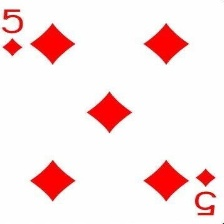

In [10]:
image, label = dataset[1392]
image

In [14]:
#create dictionary to match class name with correct labe;l
data_dir=('/kaggle/input/d/gpiosenka/cards-image-datasetclassification/train')
target_to_class = {v: k for k, v in ImageFolder(data_dir).class_to_idx.items()}
print(target_to_class)

{0: 'ace of clubs', 1: 'ace of diamonds', 2: 'ace of hearts', 3: 'ace of spades', 4: 'eight of clubs', 5: 'eight of diamonds', 6: 'eight of hearts', 7: 'eight of spades', 8: 'five of clubs', 9: 'five of diamonds', 10: 'five of hearts', 11: 'five of spades', 12: 'four of clubs', 13: 'four of diamonds', 14: 'four of hearts', 15: 'four of spades', 16: 'jack of clubs', 17: 'jack of diamonds', 18: 'jack of hearts', 19: 'jack of spades', 20: 'joker', 21: 'king of clubs', 22: 'king of diamonds', 23: 'king of hearts', 24: 'king of spades', 25: 'nine of clubs', 26: 'nine of diamonds', 27: 'nine of hearts', 28: 'nine of spades', 29: 'queen of clubs', 30: 'queen of diamonds', 31: 'queen of hearts', 32: 'queen of spades', 33: 'seven of clubs', 34: 'seven of diamonds', 35: 'seven of hearts', 36: 'seven of spades', 37: 'six of clubs', 38: 'six of diamonds', 39: 'six of hearts', 40: 'six of spades', 41: 'ten of clubs', 42: 'ten of diamonds', 43: 'ten of hearts', 44: 'ten of spades', 45: 'three of clu

In [18]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

dataset = PlayingCardDataset(data_dir, transform)

In [19]:
image, label = dataset[100]
image.shape

torch.Size([3, 128, 128])

In [21]:
for image, label in dataset:
    break

Dataloader

In [23]:
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)


In [45]:
for images, labels in dataloader:
    break

In [46]:
images.shape, labels.shape


(torch.Size([32, 3, 128, 128]), torch.Size([32]))

In [33]:
labels

tensor([30, 28, 21, 40, 43, 29, 50, 16, 36,  8, 26, 27, 49, 32, 38, 16, 27, 11,
         6, 12, 46, 42, 33,  1, 31, 10, 17, 42, 17, 30,  6,  0])

# Building Pytorch model

In [39]:
class SimpleCardClassifier(nn.Module):
    def __init__(self, num_classes=53):
        #define all the parts of the model
        super(SimpleCardClassifier, self).__init__()
        self.base_model = timm.create_model('efficientnet_b0', pretrained=True)
        self.features = nn.Sequential(*list(self.base_model.children())[:-1])
        enet_out_size = 1280
        self.classifier = nn.Linear(enet_out_size, num_classes)
                
    def forward(self, x):
        # connect model parts  and return output
        x = self.features(x)
        output = self.classifier(x)
        return output

In [41]:
model = SimpleCardClassifier(num_classes=53)

In [43]:
print(str(model)[:500])

SimpleCardClassifier(
  (base_model): EfficientNet(
    (conv_stem): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNormAct2d(
      32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
      (drop): Identity()
      (act): SiLU(inplace=True)
    )
    (blocks): Sequential(
      (0): Sequential(
        (0): DepthwiseSeparableConv(
          (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=Fa


In [49]:
model(images)

tensor([[-0.0206,  0.0802, -0.1980,  ...,  0.3840, -0.0378,  0.1719],
        [-0.0155, -0.6466,  0.2306,  ...,  0.4075,  0.2854, -0.7042],
        [-0.0716, -0.2316, -0.0659,  ..., -0.2771,  0.1181, -0.0976],
        ...,
        [-0.5918, -0.2213, -0.2197,  ..., -0.2770,  0.2803,  0.1658],
        [-0.9331, -0.7307, -0.5529,  ...,  0.1356, -0.4349,  0.2821],
        [-0.1765,  0.2907, -0.1676,  ..., -0.4381, -0.0605, -0.0806]],
       grad_fn=<AddmmBackward0>)

In [50]:
example_out = model(images)
example_out.shape

torch.Size([32, 53])

# Create training loop

In [62]:
 #loss function
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [68]:
criterion(example_out, labels)
print(example_out.shape, labels.shape)

torch.Size([32, 53]) torch.Size([32])


In [82]:
transform = transforms.Compose([
    transforms.Resize((128,128)),
    transforms.ToTensor(),
])

train_folder = '/kaggle/input/d/gpiosenka/cards-image-datasetclassification/train'
valid_folder = '/kaggle/input/d/gpiosenka/cards-image-datasetclassification/valid'
test_folder = '/kaggle/input/d/gpiosenka/cards-image-datasetclassification/test'

train_dataset = PlayingCardDataset(train_folder, transform=transform)
valid_dataset = PlayingCardDataset(valid_folder, transform=transform)
test_dataset = PlayingCardDataset(test_folder, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=16, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)



In [77]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [78]:
print(device)

cpu


In [85]:

num_epochs = 5
train_losses, val_losses = [], []


model = SimpleCardClassifier(num_classes=53)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in tqdm(train_loader, desc='Training loop'):
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward() #back propagation
        optimizer.step()
        running_loss += loss.item() * images.size(0)
    train_loss = running_loss / len(train_loader.dataset)
    train_losses.append(train_loss)

    #validation phase
    model.eval()
    running_loss = 0.0
    with torch.no_grad():
        for images, labels in tqdm(valid_loader, desc='Validation loop'):
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * images.size(0)
    val_loss = running_loss / len(valid_loader.dataset)
    val_losses.append(val_loss)

    #epoch stats
    print(f"Epoch {epoch+1}/{num_epochs} - Train loss: {train_loss}, Valid loss: {val_loss}")

Training loop:   0%|          | 0/477 [00:00<?, ?it/s]

Validation loop:   0%|          | 0/17 [00:00<?, ?it/s]

Epoch 1/5 - Train loss: 1.6818402281025149, Valid loss: 0.3801279034254686


Training loop:   0%|          | 0/477 [00:00<?, ?it/s]

Validation loop:   0%|          | 0/17 [00:00<?, ?it/s]

Epoch 2/5 - Train loss: 0.6858355480970391, Valid loss: 0.21118555968662478


Training loop:   0%|          | 0/477 [00:00<?, ?it/s]

Validation loop:   0%|          | 0/17 [00:00<?, ?it/s]

Epoch 3/5 - Train loss: 0.4426777471728615, Valid loss: 0.21143700574647706


Training loop:   0%|          | 0/477 [00:00<?, ?it/s]

Validation loop:   0%|          | 0/17 [00:00<?, ?it/s]

Epoch 4/5 - Train loss: 0.3134516678859967, Valid loss: 0.11165770636695736


Training loop:   0%|          | 0/477 [00:00<?, ?it/s]

Validation loop:   0%|          | 0/17 [00:00<?, ?it/s]

Epoch 5/5 - Train loss: 0.2453429333177656, Valid loss: 0.11046895758723313


# Visualize losses

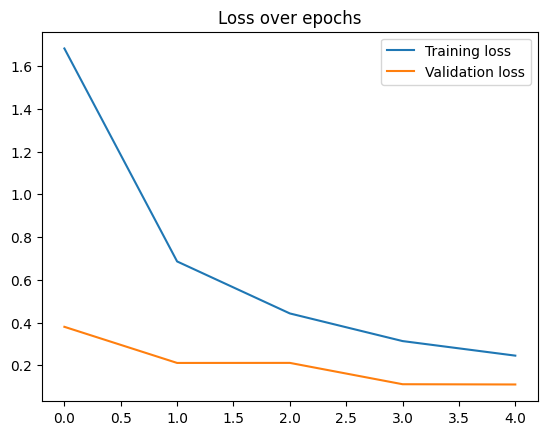

In [88]:
plt.plot(train_losses, label="Training loss")
plt.plot(val_losses, label="Validation loss")
plt.legend()
plt.title('Loss over epochs')
plt.show()

# Evaluating the results

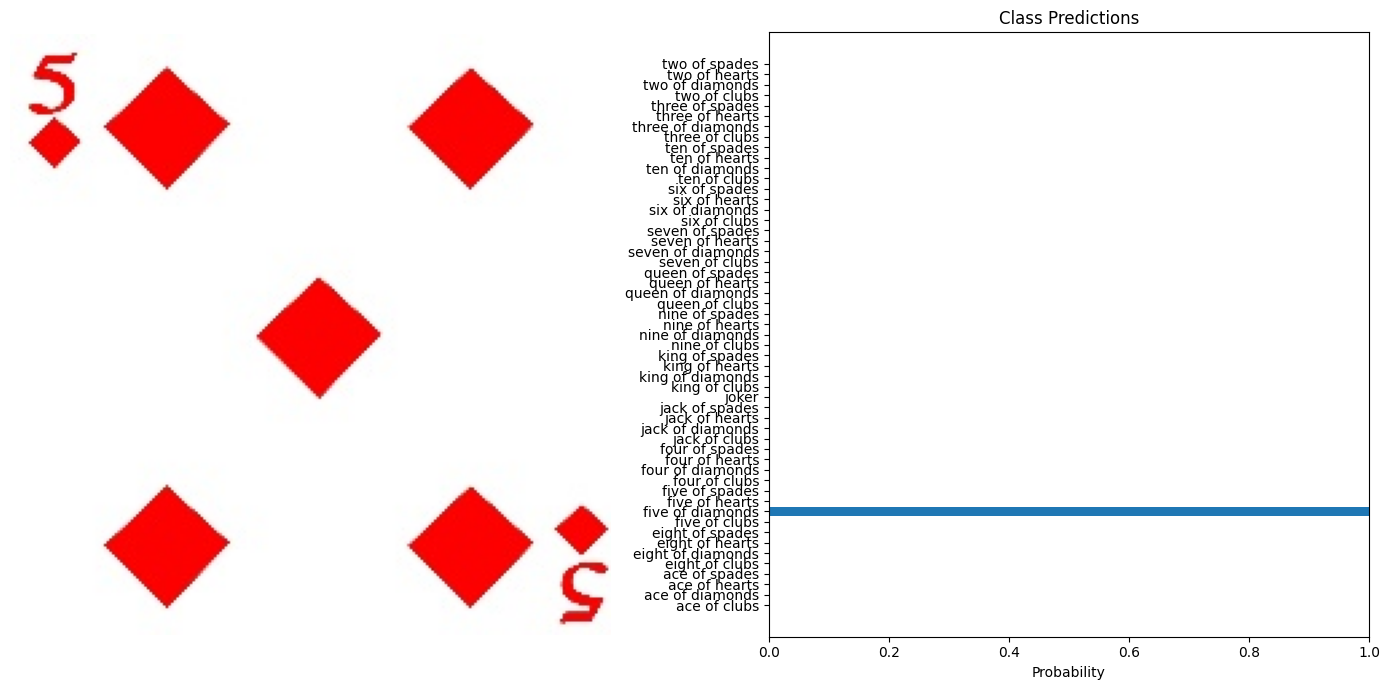

In [90]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess the image
def preprocess_image(image_path, transform):
    image = Image.open(image_path).convert("RGB")
    return image, transform(image).unsqueeze(0)

# Predict using the model
def predict(model, image_tensor, device):
    model.eval()
    with torch.no_grad():
        image_tensor = image_tensor.to(device)
        outputs = model(image_tensor)
        probabilities = torch.nn.functional.softmax(outputs, dim=1)
    return probabilities.cpu().numpy().flatten()

# Visualization
def visualize_predictions(original_image, probabilities, class_names):
    fig, axarr = plt.subplots(1, 2, figsize=(14, 7))
    
    # Display image
    axarr[0].imshow(original_image)
    axarr[0].axis("off")
    
    # Display predictions
    axarr[1].barh(class_names, probabilities)
    axarr[1].set_xlabel("Probability")
    axarr[1].set_title("Class Predictions")
    axarr[1].set_xlim(0, 1)

    plt.tight_layout()
    plt.show()

# Example usage
test_image = "/kaggle/input/d/gpiosenka/cards-image-datasetclassification/test/five of diamonds/2.jpg"
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

original_image, image_tensor = preprocess_image(test_image, transform)
probabilities = predict(model, image_tensor, device)

# Assuming dataset.classes gives the class names
class_names = dataset.classes 
visualize_predictions(original_image, probabilities, class_names)

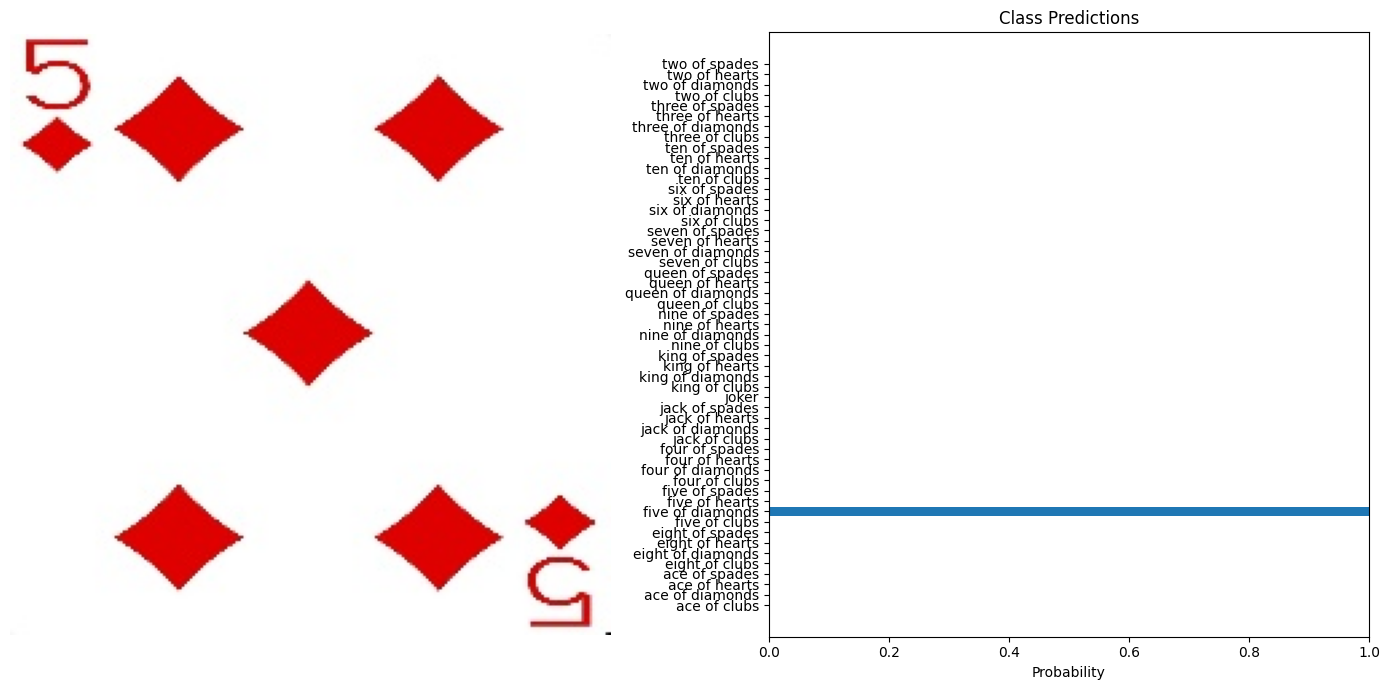

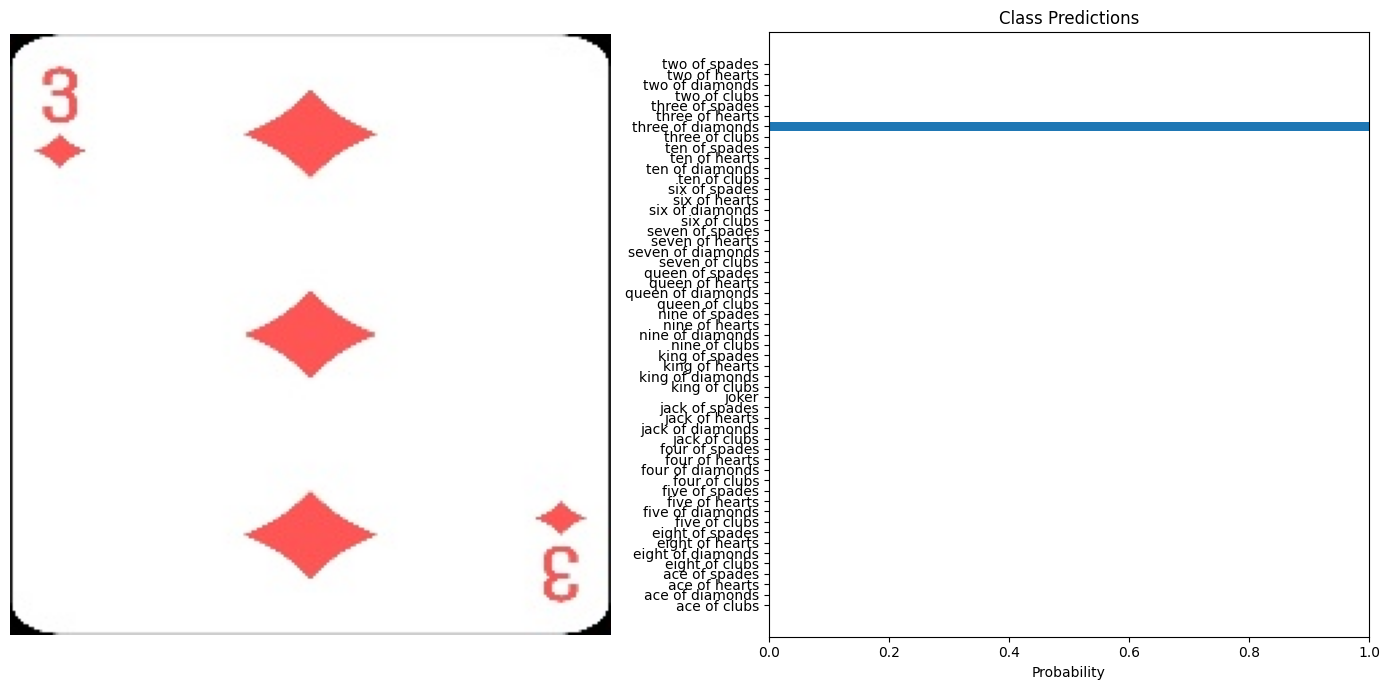

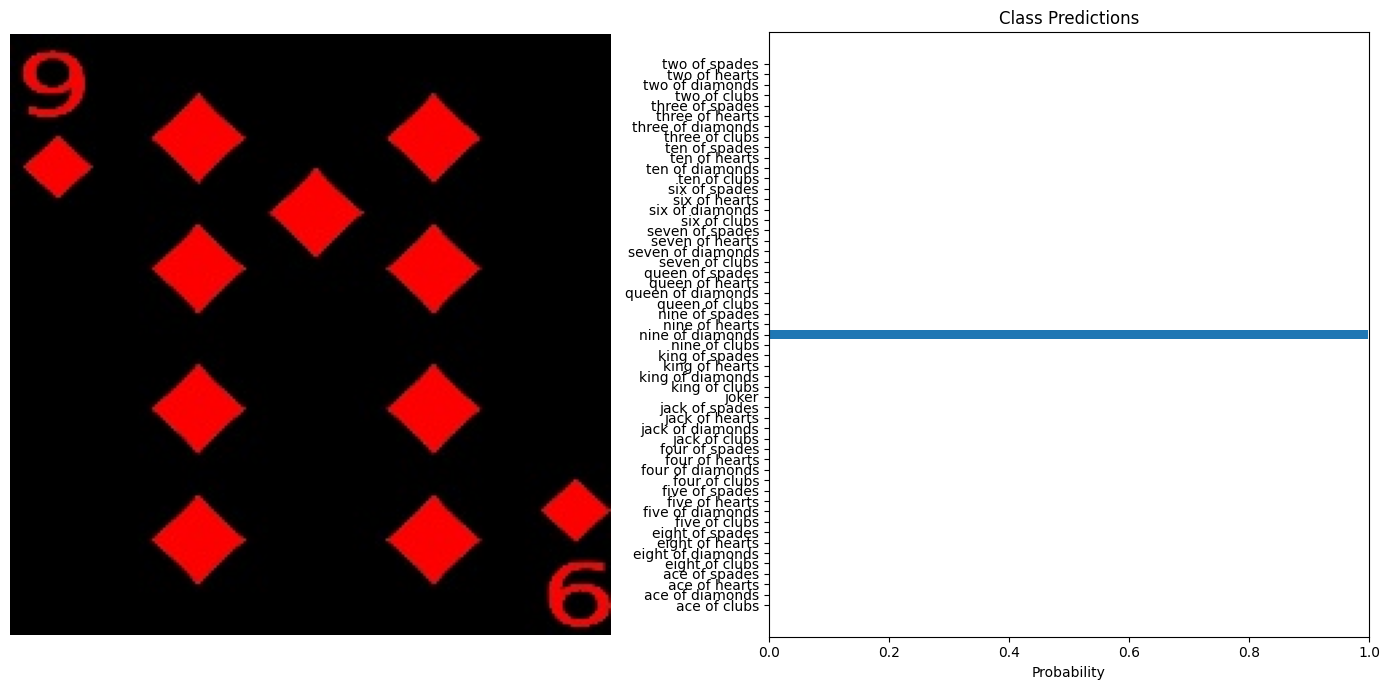

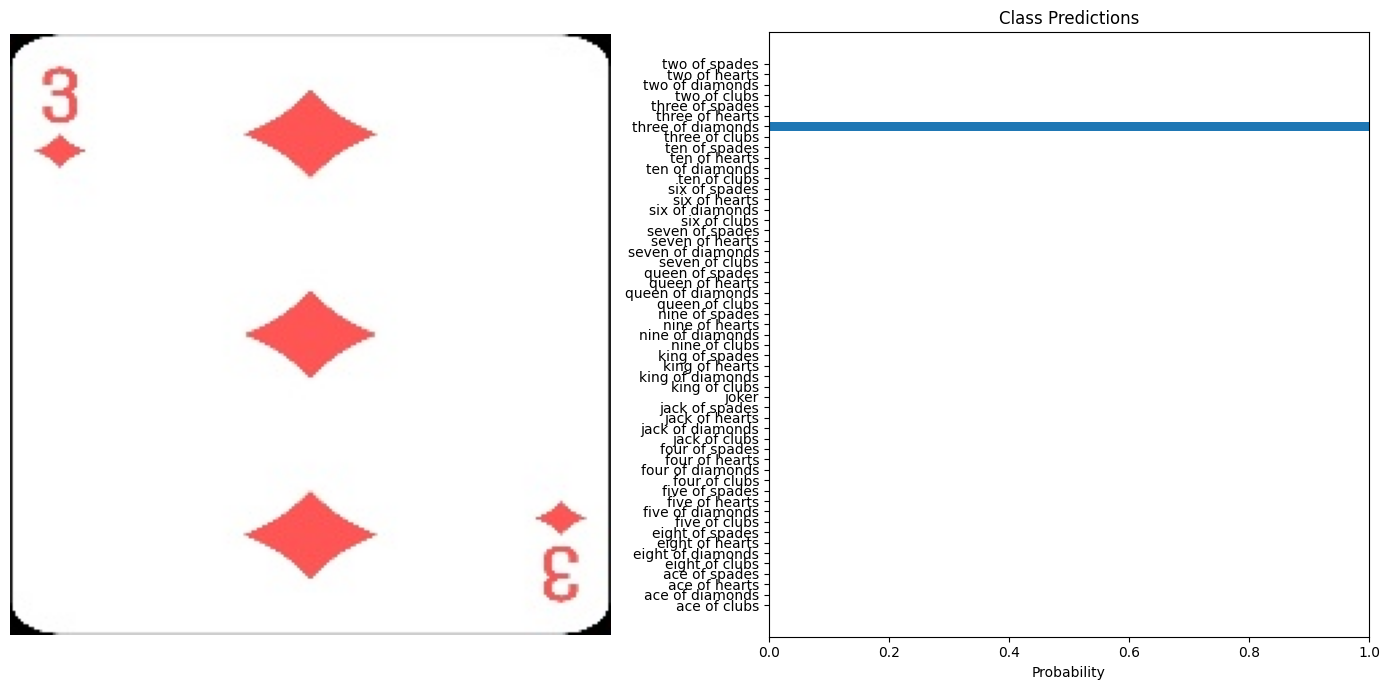

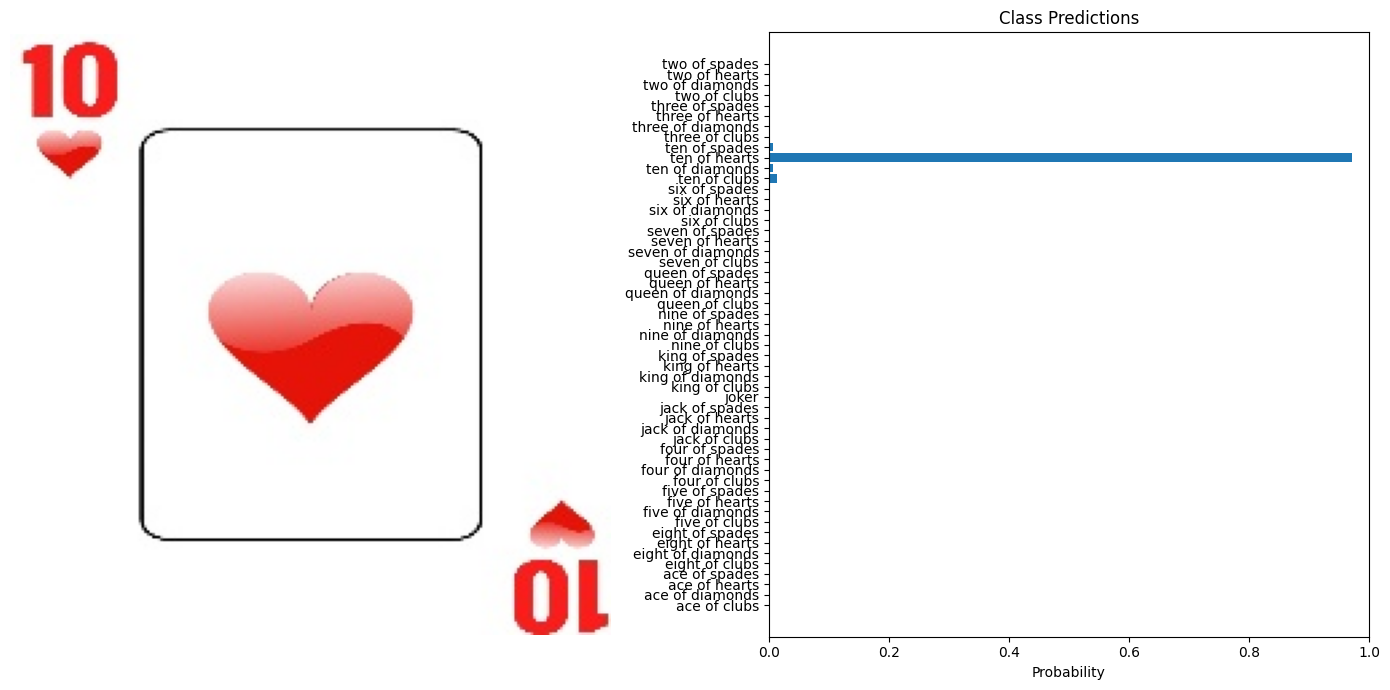

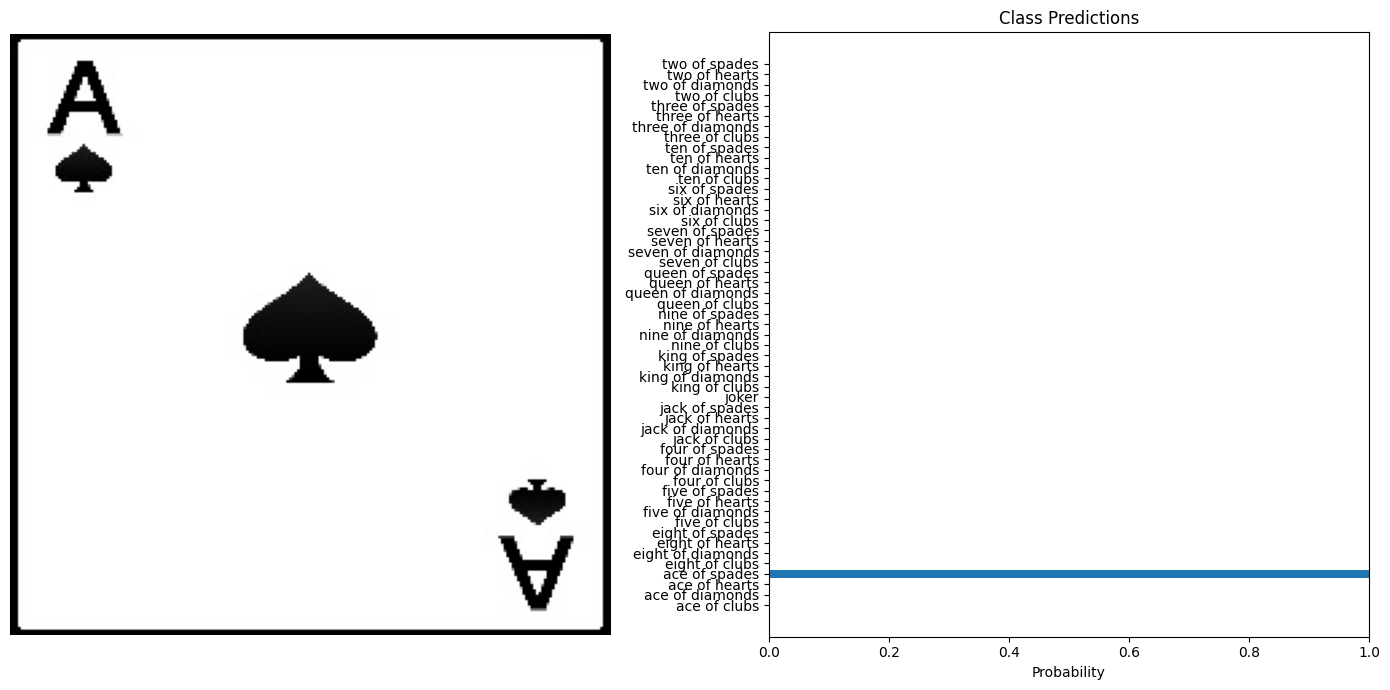

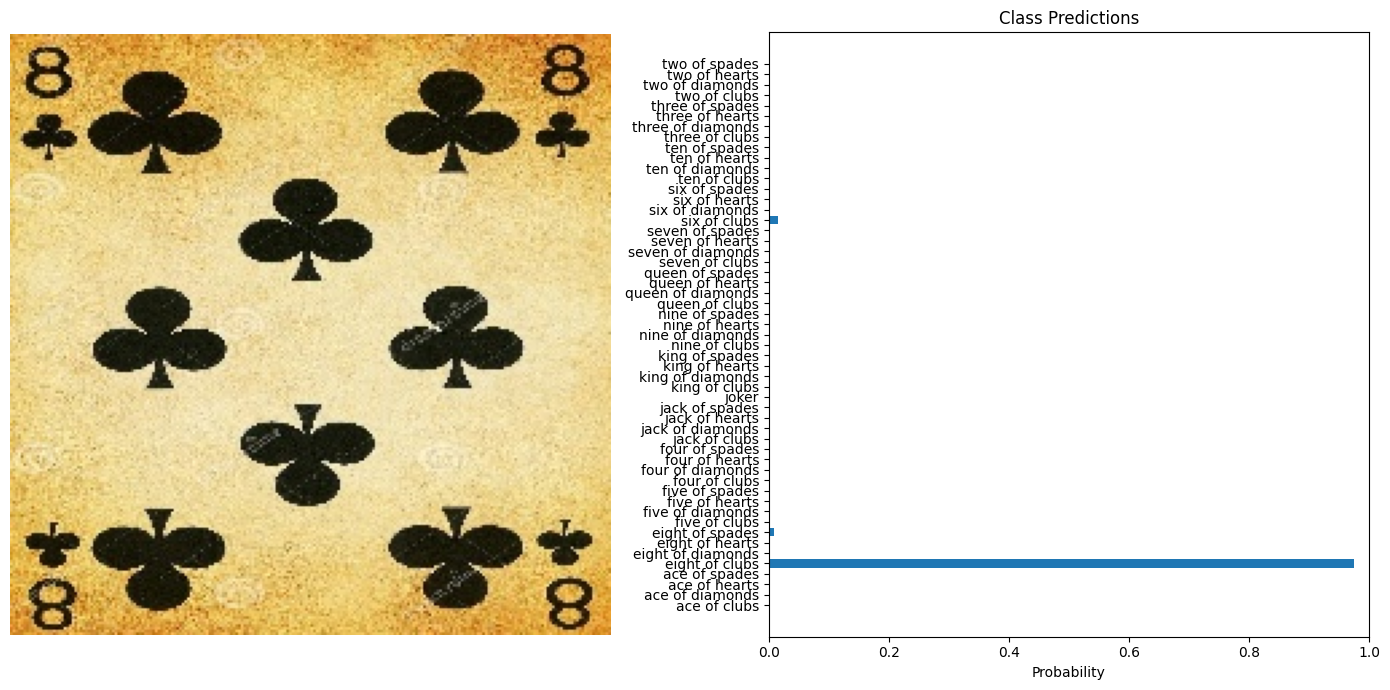

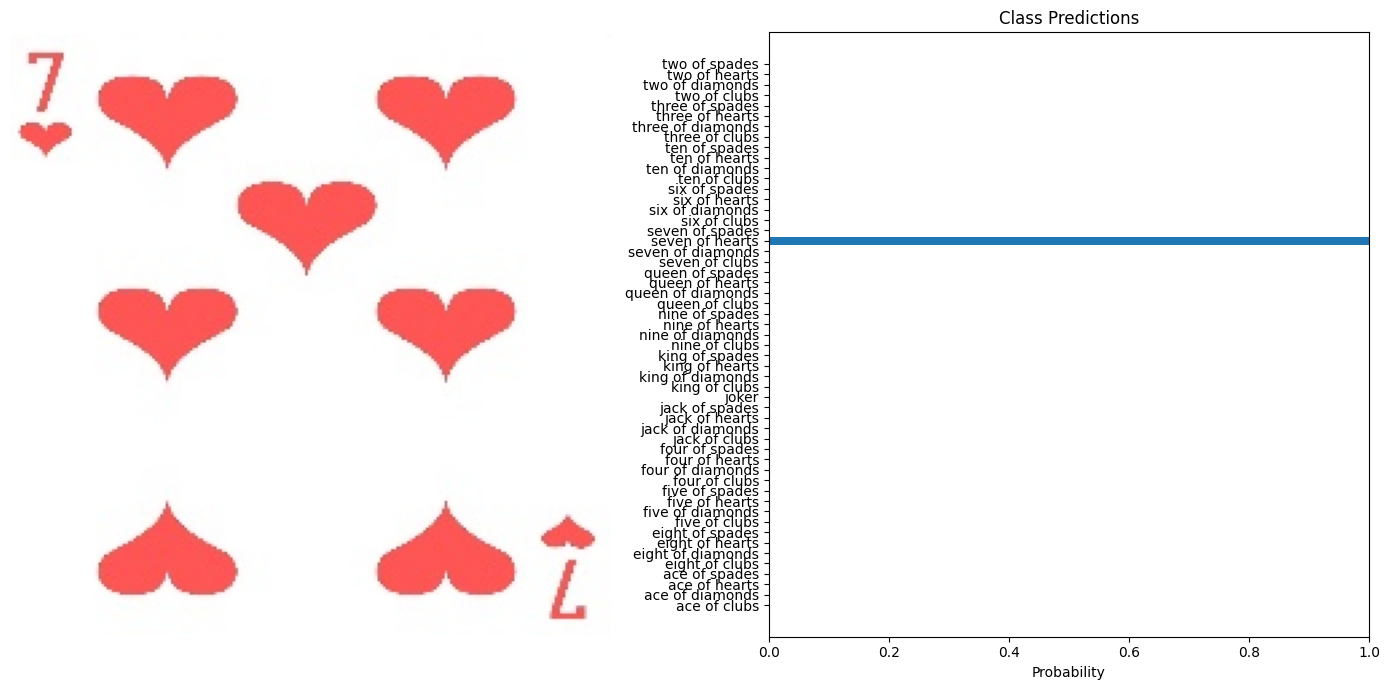

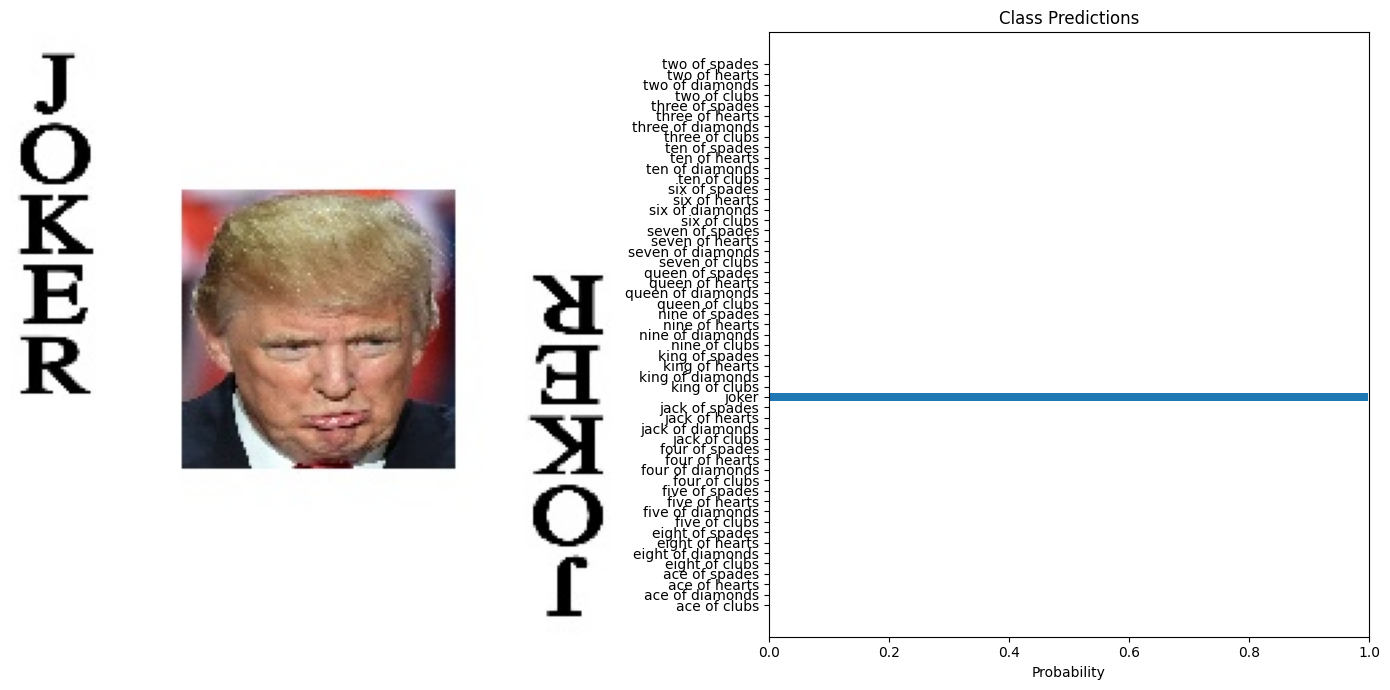

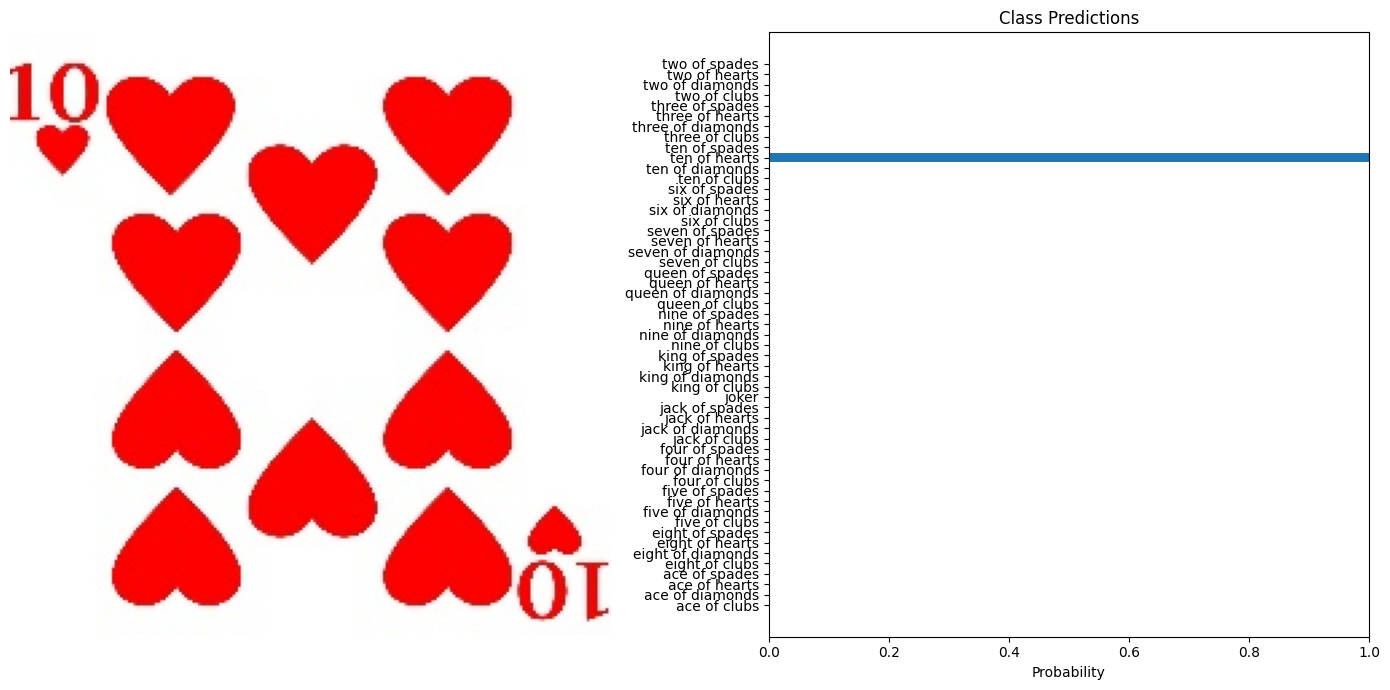

In [92]:
from glob import glob
test_images = glob('/kaggle/input/d/gpiosenka/cards-image-datasetclassification/test/*/*')
test_examples = np.random.choice(test_images, 10)

for example in test_examples:
    original_image, image_tensor = preprocess_image(example, transform)
    probabilities = predict(model, image_tensor, device)

    # Assuming dataset.classes gives the class names
    class_names = dataset.classes 
    visualize_predictions(original_image, probabilities, class_names)